# SimpleHypergraphs.jl

## Overview
`SimpleHypergraphs.jl` is a package for hypergraph algorithms in Julia. The package is written in pure Julia. However a compability with Python's [HyperNetX](https://github.com/pnnl/HyperNetX) package is provided for plotting purposes. 


## Getting ready




### Installing the library
Note that this code has been tested with Julia 1.4.2 and SimpleHypergraphs.jl version `v0.1.12` and thus this version is being installed in the cell below. However, you can try to skip the version number and just use `pkg"add SimpleHypergraphs"`.


In [56]:
using Pkg

In [3]:
pkg"add SimpleHypergraphs#v0.1.12"

  Resolving package versions...
   Updating `C:\JuliaPkg\Julia1.4.2\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\JuliaPkg\Julia1.4.2\environments\v1.4\Manifest.toml`
 [no changes]


In [58]:
pkg"status SimpleHypergraphs"

Status `C:\JuliaPkg\Julia1.4.2\environments\v1.4\Project.toml`
  [aa4a32ff] SimpleHypergraphs v0.1.11 #master (https://github.com/pszufe/SimpleHypergraphs.jl.git)


### Installation of the plotting packages

The `GraphPlot` package will make it possible to vizualize classic graph representations of a hypergraph such as bisection or 2-section representation.

In [59]:
pkg"add GraphPlot"

  Resolving package versions...
   Updating `C:\JuliaPkg\Julia1.4.2\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\JuliaPkg\Julia1.4.2\environments\v1.4\Manifest.toml`
 [no changes]


The second option is to use for visualisation the Python's [HyperNetX](https://github.com/pnnl/HyperNetX). In order for this integration to work you need to install `PyCall.jl` and `Conda.jl` along with appropiate Python modules.

In [ ]:
pkg"add PyCall Conda"
using PyCall
using Conda
Conda.runconda(`install matplotlib --yes`)
Conda.runconda(`install networkx --yes`)
run(`$(PyCall.python) -m pip install hypernetx`)`
# since the output of this command is long it is not included in this notebook

## A simple example

Include the library package with *using*.

In [42]:
using SimpleHypergraphs

Usually SimpleHypergraphs is used together with standard LightGraphs.jl library

In [43]:
import LightGraphs

We start by creating an empty hyperaph with 5 vertices and 4 hyperedges 

In [44]:
h = Hypergraph{Float64}(5,4)

5×4 Hypergraph{Float64,Nothing,Nothing,Dict{Int64,Float64}}:
 nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing

No we add the connection weights

In [45]:
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

h

5×4 Hypergraph{Float64,Nothing,Nothing,Dict{Int64,Float64}}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5
  nothing   nothing  4.5       4.5
  nothing  6.5        nothing  5.5

In [46]:
#basic operations over the hg h
@assert add_vertex!(h) == 6
@assert add_hyperedge!(h) == 5

h[5,5] = 1.2
h[6,5] = 1.3

h

6×5 Hypergraph{Float64,Nothing,Nothing,Dict{Int64,Float64}}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2
  nothing   nothing   nothing   nothing  1.3

## Visualizing a hypegraph

To visualize a given hypergraph `h`, the user needs to specify two mandatory parameters:
1. the hypergraph `h` to draw
2. which method should be used to visualize `h`
    * `GraphBased` represents each hyperedge `he` with a *fake* vertex `fv` to which each vertex `v ∈ he` is connected.
    * `HyperNetX` renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. 

### A `GraphBased` visualization

#### Vertices options

* If `with_node_labels=true`, but `node_labels` is not specified, vertex ids will be used as their label.

In [47]:
SimpleHypergraphs.draw(h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #wheter displaying or not node labels
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div10\"></div>\n\n    <script src=\"https://aleant93.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5,\"5\":1.2},{\"5\":1.3}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"4\":4.5,\"3\":2.5,\"5\":5.5},{\"5\":1.2,\"6\":1.3}],\n            \"div10\",\n            vmeta=[null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* Different radii, colors, strokes, stroke-widths, opacities and labels can be specified for each node. If one of these parameters is specified, the corresponding default value for each vertex will be ignored.

In [50]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_colors = ["yellow", "yellow", "yellow", "blue", "red", "red", "blue"],
    node_stroke = "orange", #same stroke for each node
    node_strokes =  ["orange", "orange", "orange", "orange", "black", "black", "black"],
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div13\"></div>\n\n    <script src=\"https://aleant93.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5,\"5\":1.2},{\"5\":1.3}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"4\":4.5,\"3\":2.5,\"5\":5.5},{\"5\":1.2,\"6\":1.3}],\n            \"div13\",\n            vmeta=[null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=[\"yellow\",\"yellow\",\"yellow\",\"blue\",\"red\",\"red\",\"blue\"],\n            nodeStroke=\"orange\",\n            nodeStrokes=[\"orange\",\"orange\",\"orange\",\"orange\",\"black\",\"black\",\"black\"],\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* If `with_node_weight=true`, each vertex weight within the hyperedges it belongs to will be displayed.

In [49]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
    with_node_weight=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div12\"></div>\n\n    <script src=\"https://aleant93.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5,\"5\":1.2},{\"5\":1.3}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"4\":4.5,\"3\":2.5,\"5\":5.5},{\"5\":1.2,\"6\":1.3}],\n            \"div12\",\n            vmeta=[null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

#### Hyperedges options

In [41]:
draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    with_node_metadata_hover=true,
    with_node_weight=true, #whether displaying vertices metadata on mouse hover
    he_colors=["green", "blue", "red", "yellow","black"], #hyperedges colors
    with_he_labels=true, #whether displaying or not hyperedge labels
    he_labels=["a","b","c","d"], #hyperedges labels
    with_he_metadata_hover=true #whether displaying hyperedges metadata on mouse hover
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div9\"></div>\n\n    <script src=\"https://aleant93.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5,\"5\":5.5,\"6\":6.5},{\"7\":5.5},{\"7\":6.5},{\"7\":6.5,\"6\":6.5}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"4\":4.5,\"3\":2.5,\"5\":5.5},{\"5\":5.5},{\"5\":6.5,\"8\":6.5},{\"7\":6.5,\"8\":6.5,\"6\":5.5}],\n            \"div9\",\n            vmeta=[null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=[\"green\",\"blue\",\"red\",\"yellow\",\"black\"],\n            withEdgeLabels=true,\n            edgeLabels=[\"a\",\"b\",\"c\",\"d\"],\n            withHyperedgesMetadataOnHover=true\n            );\n    </script>\n    </footer>\n")

### A Euler-based visualization

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).

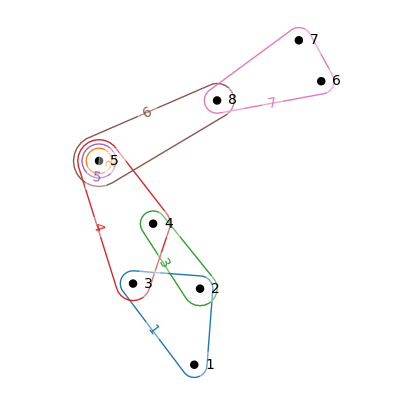

In [40]:
draw(h, HyperNetX; width=5, height=5, no_border=true)

There are many options for `Hypergraph` plotting. Type `?draw` to see them all.

In [11]:
?draw  # press Ctrl+Enter to see documentation for `draw`

## Bipartite View of the hypergraph
The type `BipartiteView` represents a non-materialized view of a bipartite representation hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

In [12]:
b = BipartiteView(h)

{11, 11} undirected simple Int64 graph

The `BipartiteView` provide LightGraphs.jl compability. 

In [13]:
supertype(typeof(b))

LightGraphs.SimpleGraphs.AbstractSimpleGraph{Int64}

We add here a edge to a parent Hypergraph of a bisection view. Note that this change will be reflected in the bipartite view

In [14]:
add_vertex!(h)

7

This graph can be plotted using `LightGraphs` tools. 

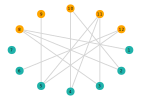

In [15]:
using GraphPlot
using LightGraphs
nodes, hyperedges = size(h)
nodes_membership = fill(1, nodes)
hyperedges_membership = fill(2, hyperedges)

membership = vcat(nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]

gplot(b, nodefillc=nodefillc, nodelabel=1:LightGraphs.nv(b), layout=circular_layout)

The functionality of `LightGraphs` can be used directly on a bipartite view of a hypergraph. 

In [16]:
LightGraphs.a_star(b, 1, 3)

2-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 8
 Edge 8 => 3

In [17]:
#number of vertices
LightGraphs.nv(b)

12

In [18]:
#number of edges
LightGraphs.ne(b)

11

In [19]:
#neighbors
sort(collect(LightGraphs.outneighbors(b,5)))

3-element Array{Int64,1}:
  9
 11
 12

In [20]:
#neighbors
sort(collect(LightGraphs.inneighbors(b,9)))

1-element Array{Int64,1}:
 5

In [21]:
#shortest path - it does not consider the nodes associated with a hyperedge
shortest_path(b,1,4)

3-element Array{Int64,1}:
 1
 2
 4

## Twosection View of the hypergraph
Represents a two section view of a hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

 Note that the view will only work correctly for hypergraphs not having overlapping hyperedges. To check
  whether a graph has overlapping edges try has_overlapping_hedges(h) - for such graph you need to fully
  materialize it rather than use a view. This can be achieved via the get_twosection_adjacency_mx(h) method.

In [22]:
# This condition is required for an unmaterialized `TwoSectionView` representation of a hypergraph to make sense
@assert SimpleHypergraphs.has_overlapping_hedges(h) == false

In [23]:
t = TwoSectionView(h)

{7, 8} undirected simple Int64 graph

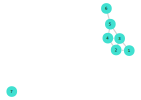

In [24]:
gplot(t, nodelabel=1:LightGraphs.nv(t))

In [25]:
#number of vertices
LightGraphs.nv(t)

7

In [26]:
#number of edges
LightGraphs.ne(t)

8

In [27]:
#neighbors
sort(collect(LightGraphs.outneighbors(t,5)))

3-element Array{Int64,1}:
 3
 4
 6

In [28]:
#neighbors
sort(collect(LightGraphs.inneighbors(t,1)))

2-element Array{Int64,1}:
 2
 3

In [29]:
#shortest path 
shortest_path(t,1,5)

3-element Array{Int64,1}:
 1
 3
 5

## Community detection in hypergraphs

Let us consider the following hypergraph

In [51]:
h = Hypergraph{Float64}(8,7)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5
h[5,5] = 5.5
h[5,6] = 6.5
h[6,7] = 5.5
h[7,7] = 6.5
h[8,7] = 6.5
h[8,6] = 6.5

h

8×7 Hypergraph{Float64,Nothing,Nothing,Dict{Int64,Float64}}:
 1.5        nothing   nothing   nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing   nothing   nothing
 1.5        nothing   nothing  2.5        nothing   nothing   nothing
  nothing   nothing  4.5       4.5        nothing   nothing   nothing
  nothing  6.5        nothing  5.5       5.5       6.5        nothing
  nothing   nothing   nothing   nothing   nothing   nothing  5.5
  nothing   nothing   nothing   nothing   nothing   nothing  6.5
  nothing   nothing   nothing   nothing   nothing  6.5       6.5

Let us search for communities in the hypergraph `h`

In [53]:
best_comm = findcommunities(h, CFModularityCNMLike(100))

display(best_comm.bm)

display(best_comm.bp)

0.24685714285714283

4-element Array{Set{Int64},1}:
 Set([4, 2, 3, 1])
 Set([7])
 Set([6])
 Set([5, 8])

And now we visualize them in 2-section view

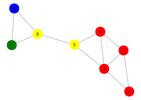

In [56]:
t = TwoSectionView(h)

function get_color(i, bp)
    color = ["red","green","blue","yellow"]
    for j in 1:length(bp)
        if i in bp[j]
            return color[j]
        end
    end
    return "black"
end

gplot(t, nodelabel=1:LightGraphs.nv(t), nodefillc=get_color.(1:LightGraphs.nv(t), Ref(best_comm.bp) ))


